In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("Ads_CTR_Optimisation.csv")

In [3]:
dataset

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,0,0,0,0,1,0,0
9996,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0
9998,1,0,0,0,0,0,0,1,0,0


In [4]:
import math
N = 10000
d = 10
ads_selected = []
no_of_selections = [0] * d
sum_of_rewards = [0] * d
total_reward = 0
for n in range(0,N):
    ad = 0
    max_upper_bound = 0
    
    for i in range(0,d):
        if(no_of_selections[i] > 0):
            avg_reward = sum_of_rewards[i] / no_of_selections[i]
            delta_i = math.sqrt(3/2 * math.log(n+1)/no_of_selections[i])
            upper_bound = avg_reward + delta_i
        else:
            upper_bound = 1e400
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
    
    
    ads_selected.append(ad)
    no_of_selections[ad] += 1
    reward = dataset.values[n,ad]
    sum_of_rewards[ad] += reward
    total_reward += reward 
        

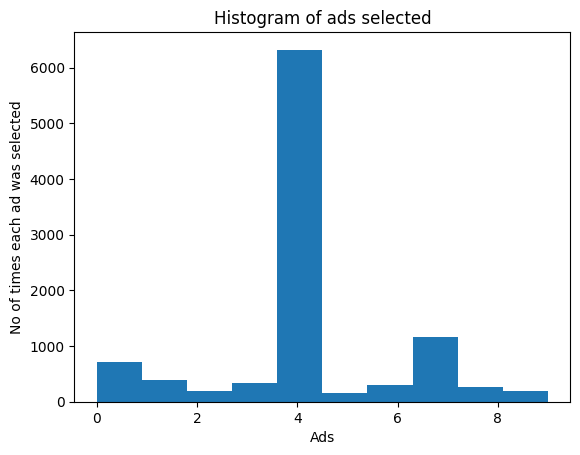

In [5]:
plt.hist(ads_selected)
plt.title("Histogram of ads selected")
plt.xlabel("Ads")
plt.ylabel("No of times each ad was selected")
plt.show()


In [6]:
N = 1000
d = 10
ads_selected = []
no_of_rewards_1 = [0] * d
no_of_rewards_0 = [0] * d
total_reward = 0
import random 
for n in range(0,N):
    ad = 0
    max_random = 0
    for i in range(0,d):
        random_beta = random.betavariate(no_of_rewards_1[i] + 1,no_of_rewards_1[i] +1)
        
        if random_beta > max_random:
            max_random = random_beta
            ad = i
            
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    if reward == 1:
        no_of_rewards_1[ad] = no_of_rewards_1[ad] + 1
    else:
        no_of_rewards_0[ad] = no_of_rewards_0[ad] + 1 
    total_reward += reward
    

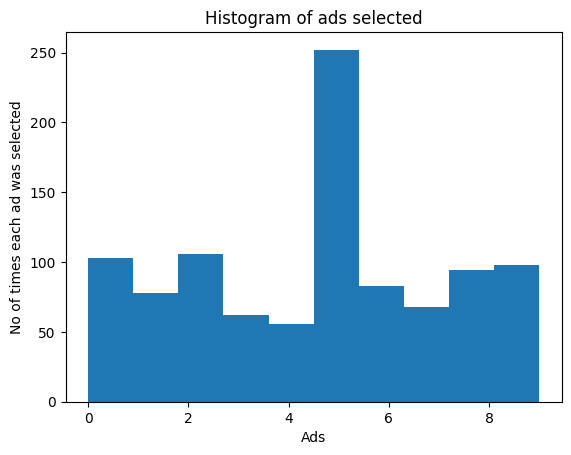

In [7]:
plt.hist(ads_selected)
plt.title("Histogram of ads selected")
plt.xlabel("Ads")
plt.ylabel("No of times each ad was selected")
plt.show()